### Lecture 30: Outlier Removal using Z-Score

Steps (Scikit-Learn)
1. Check distribution of column must normally distibuted  or (bell shape)
2. Get Upper Limit & Lower Limit
3. Check outliers
4. Remove or Cap them

**Always use this approach when data is normally distributed**

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error

Making a Dataframe with outliers

In [3]:

np.random.seed(42)
n = 1000  

ages = np.random.randint(22, 60, size=1000)


salaries = ages * 1500 + np.random.randint(20000, 40000, size=1000)

# Convert into DataFrame
df = pd.DataFrame({"age": ages, "salary": salaries})


n_outliers = 100
outlier_indices = np.random.choice(df.index, size=n_outliers, replace=False)




df.loc[outlier_indices, "salary"] = np.random.randint(300000, 1000000, size=n_outliers)

print("Shape:", df.shape)

Shape: (1000, 2)


In [4]:
# Splitting of Data


X_train,X_test,y_train,y_test=train_test_split(df['age'],df['salary'],test_size=0.2,random_state=42)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)


# Making a model 


model=LinearRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)




# Checking R2  Score

print("R² Score before removing\noutliers:", r2_score(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))




R² Score before removing
outliers: -0.009108848319885787
MAE: 109879.32227679022


Finding Upper & Lower Limit

In [5]:
UL=df['salary'].mean()+3*df['salary'].std()

LL=df['salary'].mean()-3*df['salary'].std()
print(LL)

-407593.77711908857


Checking For outliers

In [6]:
mean_salary=df['salary'].mean()
std_salary=df['salary'].std()

In [7]:
df['Z_Score_salary']=(df['salary']-mean_salary)/std_salary

In [8]:
df[(df['salary']>UL) |(df['salary']<LL) ].shape

(47, 3)

Trimming

In [9]:
new_df=df[(df['salary']<UL) & (df['salary']>LL) ]

In [10]:
new_df.shape

(953, 3)

In [11]:
# Splitting of Data


X_train,X_test,y_train,y_test=train_test_split(new_df['age'],new_df['salary'],test_size=0.2,random_state=42)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)


# Making a model 


model=LinearRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)




# Checking R2  Score

print("R² Score after removing \noutliers:", r2_score(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))




R² Score after removing 
outliers: 0.016315997155211148
MAE: 39161.42838672197


Capping

In [12]:
capped=df.copy()
capped['salary']=capped['salary'].clip(upper=UL,lower=LL)

In [13]:
capped[(capped['salary']>UL) | (capped['salary']<LL)]

,age,salary,Z_Score_salary


In [14]:
# Splitting of Data


X_train,X_test,y_train,y_test=train_test_split(capped['age'],capped['salary'],test_size=0.2,random_state=42)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)


# Making a model 


model=LinearRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)




# Checking R2  Score

print("R² Score after removing outliers:", r2_score(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))




R² Score after removing outliers: -0.008539583548448526
MAE: 95112.01134896293


<Axes: ylabel='salary'>

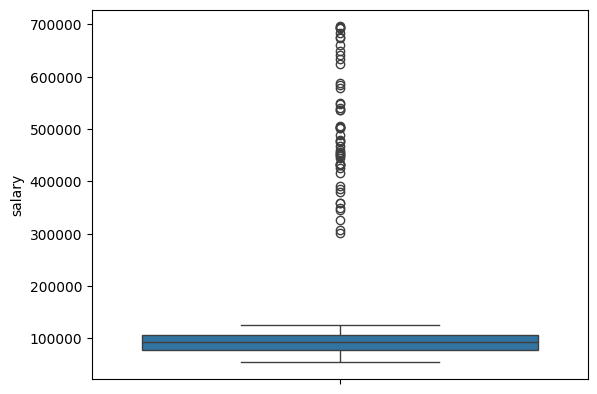

In [15]:
sns.boxplot(new_df['salary'])

<Axes: ylabel='salary'>

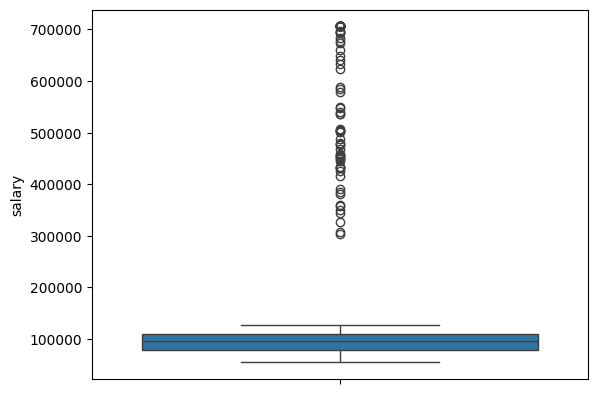

In [16]:
sns.boxplot(capped['salary'])